In [1]:
##########################
# Jacob van de Lindt
# Feb 2024
##########################


import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_straps = 6
freq = 0.5e9
w0 = 2*np.pi*freq
C = 1.12e-12
L = 1/(w0**2*C)
print('C: ', C, ' F', 'L: ', L, 'H')
M = 4.7/w0
print('M: ', M, ' H')

RL = 2
Rc = 0.000
Rt = RL+ Rc

def get_Zmat(num_straps, w, S, M, R0):
    Zmat = np.zeros((num_straps, num_straps), dtype=complex)
    for i in range(num_straps):
        for j in range(num_straps):
            if i == j:
                Zmat[i,j] = -S
                if i !=0:
                    Zmat[i, j-1] = -1j*w*M
                if i != num_straps-1:
                    Zmat[i,j+1] = -1j*w*M
    Zmat[-1,-1] = -S - R0
    return Zmat


def solve_TWA(f, w0, num_straps, Vin, L, C, M, Rt, R0):
    w = 2*np.pi*f
    S = Rt + 1j*w*L - 1j/(w*C) # make function 
    #print('S: ', S)
    V_vec= np.zeros((num_straps, 1), dtype=complex)
    V_vec[0] = Vin

    # calaculate Zin0 for the reflection coeffecient 
    S0 = Rt + 1j*w0*L - 1j/(w0*C) # + Rt # S0 at resonance
    Zmat0 = get_Zmat(num_straps, w0, S0, M, R0)
    I_vec0 = np.matmul(np.linalg.inv(Zmat0), V_vec)
    Zin0 = np.abs(Vin/I_vec0[0]) # TODO made this abs
    print('R0: ', R0, 'Zin0: ', Zin0)

    Zmat = get_Zmat(num_straps, w, S, M, R0)
    #print('---')
    #print(Zmat)
    #print('---')
    #Zit = np.sqrt(np.abs(Zmat[0,0])**2 - np.abs(Zmat[-1,-1])**2)
    #print(Zit)
    #print(Zmat)
    I_vec = np.matmul(np.linalg.inv(Zmat), V_vec)
    Pt = 0.5*np.abs(I_vec[-1])**2*R0
    Pf = (0.5*np.real(np.conjugate(I_vec[0])*Vin)) # absolute value to get rid of sign? #TODO add back in abs
    #print(np.conjugate(I_vec[0])*Vin)
    Zin = np.abs(Vin/I_vec[0]) # TODO made this abs
    print("Zin: ", Zin)
    #print(I_vec)
    #print(Zin)
    
    T = Pt/Pf
    rho = (Zin - Zin0)/(Zin + Zin0)
    R = (np.abs(rho)**2)
    A = 1 - (R + T)

    return T, R, A, Pt, Pf, I_vec, Zin


C:  1.12e-12  F L:  9.046534253780158e-08 H
M:  1.4960564650638161e-09  H


In [3]:
T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(w0/(2*np.pi), w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
Zin

R0:  4.7 Zin0:  [5.70716399]
Zin:  [5.70716399]


array([5.70716399])

In [4]:
K = M/L
print(K)

0.016537343728496672


In [5]:
# scan the Zin for different Rt:
num_straps = 10
Rt_array = np.linspace(0, 6, 100)
Zin_array = np.zeros_like(Rt_array, dtype=complex)
for i in range(Rt_array.shape[0]):
    Rt = Rt_array[i]
    T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(w0/(2*np.pi), w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
    Zin_array[i] = Zin[0]

def Zin3_analytical(Rt, R0, M, w):
    return Rt + R0*(w**2*M**2) / (w**2*M**2 + Rt*R0)

def Zi_any2(Rt, M, w):
    return w*M*(1 - (1/8)*(Rt/(w*M))**2)

Zinany = Zin3_analytical(Rt_array, R0=w0*M, M=M, w=w0)
Zinany2 = Zi_any2(Rt_array, M, w=w0)

R0:  4.7 Zin0:  [4.7]
Zin:  [4.7]
R0:  4.7 Zin0:  [4.70366743]
Zin:  [4.70366743]
R0:  4.7 Zin0:  [4.71379621]
Zin:  [4.71379621]
R0:  4.7 Zin0:  [4.72924876]
Zin:  [4.72924876]
R0:  4.7 Zin0:  [4.74908331]
Zin:  [4.74908331]
R0:  4.7 Zin0:  [4.77251838]
Zin:  [4.77251838]
R0:  4.7 Zin0:  [4.79890457]
Zin:  [4.79890457]
R0:  4.7 Zin0:  [4.82770198]
Zin:  [4.82770198]
R0:  4.7 Zin0:  [4.85846182]
Zin:  [4.85846182]
R0:  4.7 Zin0:  [4.89081137]
Zin:  [4.89081137]
R0:  4.7 Zin0:  [4.92444163]
Zin:  [4.92444163]
R0:  4.7 Zin0:  [4.95909701]
Zin:  [4.95909701]
R0:  4.7 Zin0:  [4.99456683]
Zin:  [4.99456683]
R0:  4.7 Zin0:  [5.03067807]
Zin:  [5.03067807]
R0:  4.7 Zin0:  [5.06728939]
Zin:  [5.06728939]
R0:  4.7 Zin0:  [5.10428598]
Zin:  [5.10428598]
R0:  4.7 Zin0:  [5.14157533]
Zin:  [5.14157533]
R0:  4.7 Zin0:  [5.17908353]
Zin:  [5.17908353]
R0:  4.7 Zin0:  [5.21675223]
Zin:  [5.21675223]
R0:  4.7 Zin0:  [5.25453598]
Zin:  [5.25453598]
R0:  4.7 Zin0:  [5.29240008]
Zin:  [5.29240008]
R0:  4

Text(0, 0.5, 'Z$_{in}$')

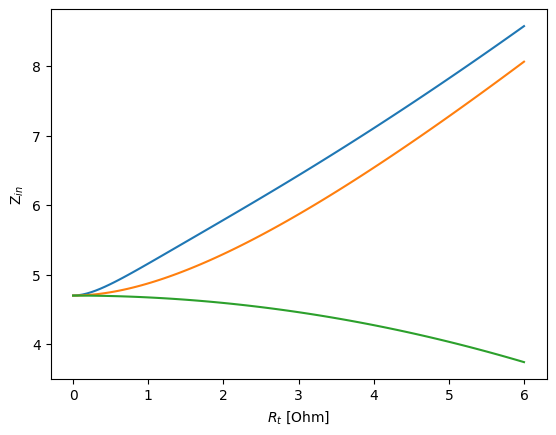

In [6]:
plt.plot(Rt_array, np.real(Zin_array))
plt.plot(Rt_array, Zinany)
plt.plot(Rt_array, Zinany2)
plt.xlabel(r'$R_t$ [Ohm]')
plt.ylabel(r'Z$_{in}$')
#plt.plot(Rt_array, np.imag(Zin_array))

In [7]:
# scan the Zin for different Rt:
num_straps = 8
# Rt_scan = np.array([0.01, 0.07, 0.1, 1.00, 2.00])
Rt_scan = np.array([0.0,0.001, 0.01, 0.04,0.06, 0.07, 0.1, 1.00, 2.00])
f_array = np.linspace(0.48e9, 0.52e9, 1000)
R_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)
T_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)
A_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)

for i in range(Rt_scan.shape[0]):
    for j in range(f_array.shape[0]):
        Rt = Rt_scan[i]
        f = f_array[j]
        T, R, A, Pt, Pf, I_vec, Zin = solve_TWA(f, w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
        R_array[i, j] = R[0]
        T_array[i, j] = T[0]
        A_array[i, j] = A[0]



R0:  4.7 Zin0:  [4.7]
Zin:  [22.29705399]
R0:  4.7 Zin0:  [4.7]
Zin:  [22.24741157]
R0:  4.7 Zin0:  [4.7]
Zin:  [22.19776321]
R0:  4.7 Zin0:  [4.7]
Zin:  [22.14810884]
R0:  4.7 Zin0:  [4.7]
Zin:  [22.09844839]
R0:  4.7 Zin0:  [4.7]
Zin:  [22.04878178]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.99910894]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.94942979]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.89974426]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.85005226]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.80035372]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.75064855]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.70093668]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.65121803]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.60149251]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.55176005]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.50202055]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.45227393]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.40252011]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.35275901]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.30299052]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.25321457]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.20343107]
R0:  4.7 Zin0:  [4.7]
Zin:  [21.15

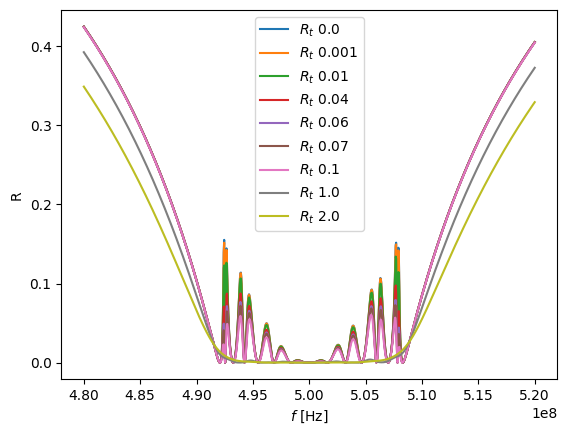

In [8]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(R_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'R')
plt.legend()

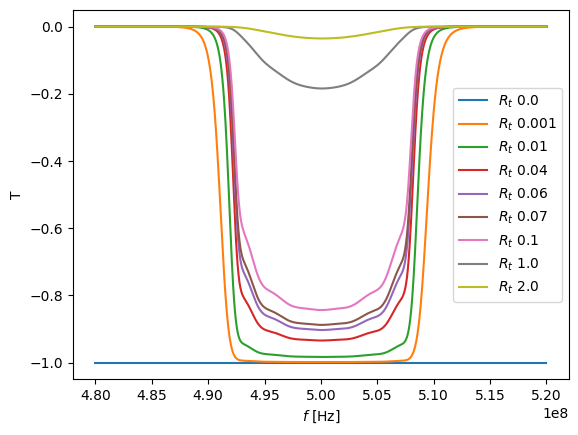

In [9]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(T_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'T')
plt.legend()

(array([], dtype=int64),)

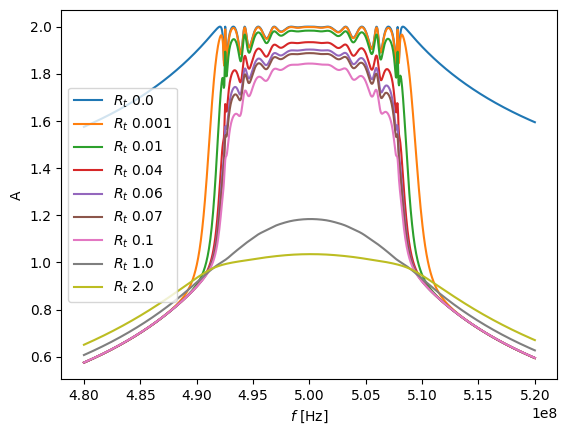

In [10]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(A_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'A')
plt.legend()
np.where(np.real(A_array[1, :]) < 0)

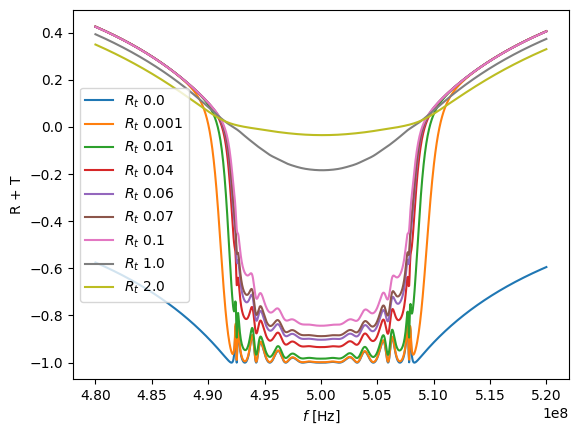

In [11]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(T_array[i, :])+np.real(R_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'R + T')
plt.legend()

In [12]:
# make plot of interstrap phase as function of frequency and power versus strap number 

In [13]:
Zmat = get_Zmat(num_straps=7, w=w0, S=0, M=M, R0=w0*M)
print(Zmat)
V_vec = np.zeros((7,1))
V_vec[0] = 1 # Vin
I_vec = np.matmul(np.linalg.inv(Zmat), V_vec)
I_vec

[[ 0. +0.j   0. -4.7j  0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. -4.7j  0. +0.j   0. -4.7j  0. +0.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0. -4.7j  0. +0.j   0. -4.7j  0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. -4.7j  0. +0.j   0. -4.7j  0. +0.j   0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j   0. -4.7j  0. +0.j   0. -4.7j  0. +0.j ]
 [ 0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. -4.7j  0. +0.j   0. -4.7j]
 [ 0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. +0.j   0. -4.7j -4.7+0.j ]]


array([[-0.21276596+0.j        ],
       [ 0.        +0.21276596j],
       [ 0.21276596+0.j        ],
       [ 0.        -0.21276596j],
       [-0.21276596+0.j        ],
       [ 0.        +0.21276596j],
       [ 0.21276596+0.j        ]])

In [14]:
####################
# Attemped Fix
def get_Zmat2(num_straps, w, L, C, M, R0, Rt):
    S = 1j*w*L - 1j/(w*C) + Rt
    Zmat = np.zeros((num_straps, num_straps), dtype=complex)
    for i in range(num_straps):
        for j in range(num_straps):
            if i == j:
                Zmat[i,j] = S
                if i !=0:
                    Zmat[i, j-1] = 1j*w*M
                if i != num_straps-1:
                    Zmat[i,j+1] = 1j*w*M
    Zmat[-1,-1] = S + R0
    return Zmat

num_straps = 7
freq = 0.5e9
w0 = 2*np.pi*freq
C = 1.12e-12
L = 1/(w0**2*C)
print('C: ', C, ' F', 'L: ', L, 'H')
M = 4.7/w0
print('M: ', M, ' H')

Rp = 0.1
Rc = 0.00
Rt = Rp + Rc

S = Rt + 1j*w0*L - 1j/(w0*C) # make function
print(S)
get_Zmat2(num_straps=num_straps, w=w0, L=L, C=C, M=M, R0=w0*M, Rt=Rt)

C:  1.12e-12  F L:  9.046534253780158e-08 H
M:  1.4960564650638161e-09  H
(0.1+0j)


array([[0.1+0.j , 0. +4.7j, 0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j ,
        0. +0.j ],
       [0. +4.7j, 0.1+0.j , 0. +4.7j, 0. +0.j , 0. +0.j , 0. +0.j ,
        0. +0.j ],
       [0. +0.j , 0. +4.7j, 0.1+0.j , 0. +4.7j, 0. +0.j , 0. +0.j ,
        0. +0.j ],
       [0. +0.j , 0. +0.j , 0. +4.7j, 0.1+0.j , 0. +4.7j, 0. +0.j ,
        0. +0.j ],
       [0. +0.j , 0. +0.j , 0. +0.j , 0. +4.7j, 0.1+0.j , 0. +4.7j,
        0. +0.j ],
       [0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j , 0. +4.7j, 0.1+0.j ,
        0. +4.7j],
       [0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j , 0. +4.7j,
        4.8+0.j ]])

In [15]:
def solve_TWA2(f, w0, num_straps, Vin, L, C, M, Rt, R0):
    w = 2*np.pi*f
    S = Rt + 1j*w*L - 1j/(w*C) # make function 
    #print('S: ', S)
    V_vec= np.zeros((num_straps, 1), dtype=complex)
    V_vec[0] = Vin

    # calaculate Zin0 for the reflection coeffecient 
    S0 = Rt + 1j*w0*L - 1j/(w0*C) # + Rt # S0 at resonance
    Zmat0 = get_Zmat2(num_straps, w0, L, C, M, R0, Rt)
    I_vec0 = np.matmul(np.linalg.inv(Zmat0), V_vec)
    Zin0 = (Vin/I_vec0[0]) # TODO made this abs
    print('R0: ', R0, 'Zin0: ', Zin0)

    Zmat = get_Zmat2(num_straps, w, L, C, M, R0, Rt)
    #print('---')
    #print(Zmat)
    #print('---')
    #Zit = np.sqrt(np.abs(Zmat[0,0])**2 - np.abs(Zmat[-1,-1])**2)
    #print(Zit)
    #print(Zmat)
    I_vec = np.matmul(np.linalg.inv(Zmat), V_vec)
    Pt = 0.5*np.abs(I_vec[-1])**2*R0
    Pf = (0.5*np.real(np.conjugate(I_vec[0])*Vin)) # absolute value to get rid of sign? #TODO add back in abs
    #Pf = 0.5*(np.abs(I_vec[0])*Vin)
    #print(np.conjugate(I_vec[0])*Vin)
    Zin = (Vin/I_vec[0]) # TODO made this abs
    print("Zin: ", Zin)
    #print(I_vec)
    #print(Zin)
    
    T = Pt/Pf
    rho = (Zin - Zin0)/(Zin + Zin0)
    R = (np.abs(rho)**2)
    A = 1 - (R + T)

    return T, R, A, Pt, Pf, I_vec, Zin

In [16]:
T, R, A, Pt, Pf, I_vec, Zin = solve_TWA2(f=4.92e8, w0=w0, num_straps=7, Vin=1, L=L, C=C, M=M, Rt=0.01, R0=w0*M)
print('Pt: ', Pt)
print('Pf: ', Pf)
print('T: ', T)
print('R: ', R)
print('A: ', A)
print(I_vec)
print('--')
for i in I_vec:
    print(f'mag: {np.abs(i)}, phase - pi: {180*np.arctan2( np.imag(i), np.real(i))/np.pi-180}')

print('np.conjugate(I_vec[0])', np.conjugate(I_vec[0]))

R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.0994429-5.10844502j]
Pt:  [0.00133982]
Pf:  [0.00190459]
T:  [0.70347013]
R:  [0.96194154]
A:  [-0.66541166]
[[0.00380918+0.19568013j]
 [0.00712846+0.17171184j]
 [0.00995147+0.14474813j]
 [0.012287  +0.11526789j]
 [0.01415785+0.08379308j]
 [0.01559927+0.05087964j]
 [0.01665715+0.0171078j ]]
--
mag: [0.19571721], phase - pi: [-91.11520018]
mag: [0.17185974], phase - pi: [-92.37721805]
mag: [0.14508981], phase - pi: [-93.93290964]
mag: [0.1159209], phase - pi: [-96.08447687]
mag: [0.08498073], phase - pi: [-99.59023325]
mag: [0.05321724], phase - pi: [-107.0450957]
mag: [0.02387755], phase - pi: [-134.2353416]
np.conjugate(I_vec[0]) [0.00380918-0.19568013j]


In [17]:
# scan the Zin for different Rt:
num_straps = 7
# Rt_scan = np.array([0.01, 0.07, 0.1, 1.00, 2.00])
Rt_scan = np.array([0.01, .1, 1, 2])#), 1.00, 2.00])#np.array([0.00000001,0.001, 0.01, 0.04,0.06, 0.07, 0.1, 1.00, 2.00])
f_array = np.linspace(0.48e9, 0.52e9, 1000)
R_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)
T_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)
A_array = np.zeros((Rt_scan.shape[0], f_array.shape[0]), dtype=complex)

for i in range(Rt_scan.shape[0]):
    for j in range(f_array.shape[0]):
        Rt = Rt_scan[i]
        f = f_array[j]
        T, R, A, Pt, Pf, I_vec, Zin = solve_TWA2(f, w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
        R_array[i, j] = R[0]
        T_array[i, j] = T[0]
        A_array[i, j] = A[0]


R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01042699-22.29705421j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01042906-22.24741178j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01043114-22.19776343j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01043323-22.14810906j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01043534-22.09844861j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01043747-22.04878201j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01043961-21.99910917j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01044177-21.94943002j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01044394-21.89974449j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01044613-21.85005249j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01044834-21.80035395j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01045056-21.75064879j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.0104528-21.70093692j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01045506-21.65121827j]
R0:  4.7 Zin0:  [4.70993658+0.j]
Zin:  [0.01045733-21.60149276j]
R0:  4.7 Zin0:  [4.7099365

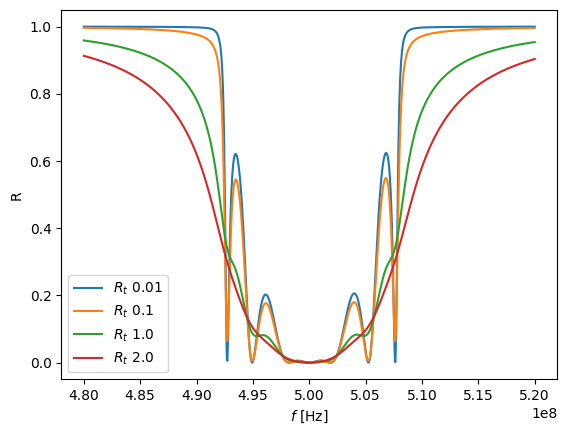

In [18]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(R_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'R')
plt.legend()

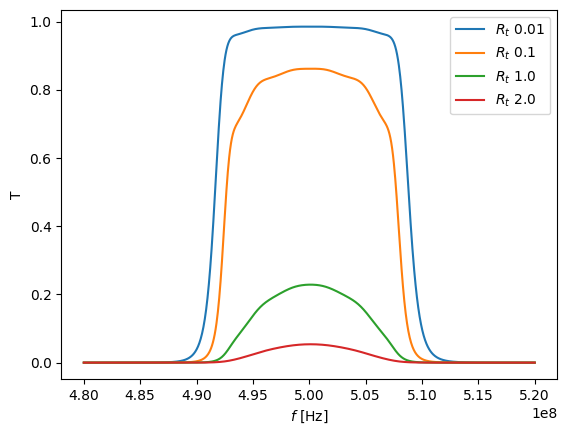

In [19]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(T_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'T')
plt.legend()

(array([285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
        298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 326, 327,
        328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
        341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
        354, 355, 356, 357, 399, 400, 401, 402, 403, 404, 405, 406, 407,
        408, 409, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601,
        602, 603, 604, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657,
        658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670,
        671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 700, 701,
        702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714,
        715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727],
       dtype=int64),)

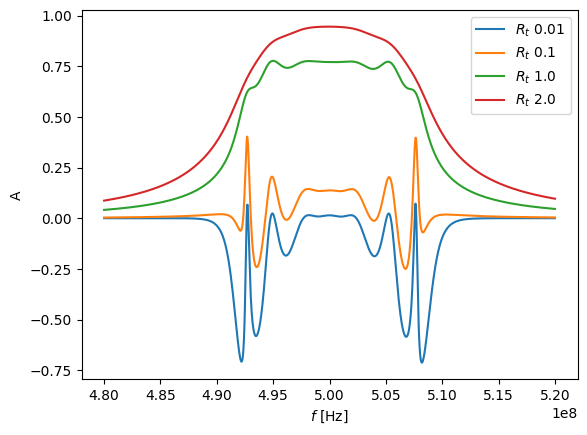

In [20]:
for i in range(Rt_scan.shape[0]):
    label = r'$R_t$ ' + str(Rt_scan[i])
    plt.plot(f_array, np.real(A_array[i, :]), label=label)

plt.xlabel(r'$f$ [Hz]')
plt.ylabel(r'A')
plt.legend()
np.where(np.real(A_array[1, :]) < 0)

In [21]:
# scan the Zin for different Rt:
num_straps = 1000
M = 100/w0
Rt_array = np.linspace(0, 6, 20)
Zin_array = np.zeros_like(Rt_array, dtype=complex)
for i in range(Rt_array.shape[0]):
    Rt = Rt_array[i]
    T, R, A, Pt, Pf, I_vec, Zin = solve_TWA2(w0/(2*np.pi), w0, num_straps, 1, L, C, M, Rt, R0=w0*M)
    Zin_array[i] = Zin[0]

def Zin3_analytical(Rt, R0, M, w):
    return Rt + R0*(w**2*M**2) / (w**2*M**2 + Rt*R0)

def Zi_any2(Rt, M, w):
    return w*M*(1 - (1/8)*(Rt/(w*M))**2)

Z3_anylitical = Zin3_analytical(Rt_array, R0=w0*M, M=M, w=w0)
Z_inf_anylitical = Zi_any2(Rt_array, M, w=w0)
M = 4.7/w0

R0:  100.0 Zin0:  [100.+0.j]
Zin:  [100.+0.j]
R0:  100.0 Zin0:  [100.15129608+0.j]
Zin:  [100.15129608+0.j]
R0:  100.0 Zin0:  [100.31571547+0.j]
Zin:  [100.31571547+0.j]
R0:  100.0 Zin0:  [100.47476951+0.j]
Zin:  [100.47476951+0.j]
R0:  100.0 Zin0:  [100.63357131+0.j]
Zin:  [100.63357131+0.j]
R0:  100.0 Zin0:  [100.79258987+0.j]
Zin:  [100.79258987+0.j]
R0:  100.0 Zin0:  [100.95185585+0.j]
Zin:  [100.95185585+0.j]
R0:  100.0 Zin0:  [101.111371+0.j]
Zin:  [101.111371+0.j]
R0:  100.0 Zin0:  [101.27113542+0.j]
Zin:  [101.27113542+0.j]
R0:  100.0 Zin0:  [101.43114907+0.j]
Zin:  [101.43114907+0.j]
R0:  100.0 Zin0:  [101.59141197+0.j]
Zin:  [101.59141197+0.j]
R0:  100.0 Zin0:  [101.75192407+0.j]
Zin:  [101.75192407+0.j]
R0:  100.0 Zin0:  [101.91268537+0.j]
Zin:  [101.91268537+0.j]
R0:  100.0 Zin0:  [102.07369584+0.j]
Zin:  [102.07369584+0.j]
R0:  100.0 Zin0:  [102.23495546+0.j]
Zin:  [102.23495546+0.j]
R0:  100.0 Zin0:  [102.39646421+0.j]
Zin:  [102.39646421+0.j]
R0:  100.0 Zin0:  [102.55822

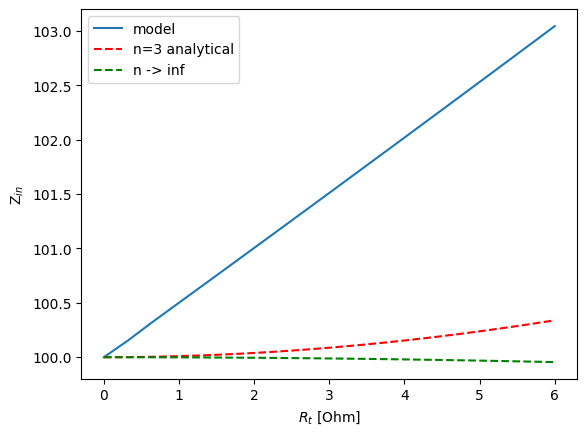

In [22]:
plt.plot(Rt_array, np.real(Zin_array), label='model')
plt.plot(Rt_array, Z3_anylitical, 'r--', label='n=3 analytical')
plt.plot(Rt_array, Z_inf_anylitical, 'g--', label='n -> inf')
plt.xlabel(r'$R_t$ [Ohm]')
plt.ylabel(r'Z$_{in}$')
plt.legend()


In [23]:
f = 0.48e9
w = 2*np.pi*f
Vin = 1
R0 = w0*M
num_straps=7
Rt = 1e-8
M = 4.7/w0

S = Rt + 1j*w*L - 1j/(w*C) # make function 
#print('S: ', S)
V_vec= np.zeros((num_straps, 1), dtype=complex)
V_vec[0] = Vin

# calaculate Zin0 for the reflection coeffecient 
S0 = Rt + 1j*w0*L - 1j/(w0*C) # + Rt # S0 at resonance
Zmat0 = get_Zmat2(num_straps, w0, L, C, M, R0, Rt)
I_vec0 = np.matmul(np.linalg.inv(Zmat0), V_vec)
Zin0 = (Vin/I_vec0[0]) # TODO made this abs
print('R0: ', R0, 'Zin0: ', Zin0)

Zmat = get_Zmat2(num_straps, w, L, C, M, R0, Rt)
#print('---')
#print(Zmat)
#print('---')
#Zit = np.sqrt(np.abs(Zmat[0,0])**2 - np.abs(Zmat[-1,-1])**2)
#print(Zit)
#print(Zmat)
I_vec = np.matmul(np.linalg.inv(Zmat), V_vec)
Pt = 0.5*np.abs(I_vec[-1])**2*R0
Pf = 0.5*np.real(np.conjugate(I_vec[0])*Vin) # absolute value to get rid of sign? #TODO add back in abs
#print(np.conjugate(I_vec[0])*Vin)
Zin = (Vin/I_vec[0]) # TODO made this abs
print("Zin: ", Zin)
#print(I_vec)
#print(Zin)

T = Pt/Pf
rho = (Zin - Zin0)/(Zin + Zin0)
R = (np.abs(rho)**2)
A = 1 - (R + T)

print('T', T)
print('R', R)
print('A', A)
print('R + T: ', R+T)


R0:  4.7 Zin0:  [4.70000001+0.j]
Zin:  [2.99415967e-08-22.297054j]
T [0.65175625]
R [1.]
A [-0.65175625]
R + T:  [1.65175625]


In [24]:
#######
# My PetraM Model
######

mu0 = 4*np.pi*10**(-7)
epsi0 = 8.85418e-12
D = 0.016
d = 0.004
Z0 = (1/(2*np.pi))*np.sqrt(mu0/epsi0)*np.log(D/d)
print('Z0: ', Z0)

Z0:  83.12015550094593
